# Assignment: Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

```{admonition} Learning Goals
:class: tip

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npy` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making scatterplots
- Annotating plots with titles and axes
```

## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [47]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [48]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx,yy = np.meshgrid(x,y)
xx.shape
yy.shape

(100, 100)

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes.

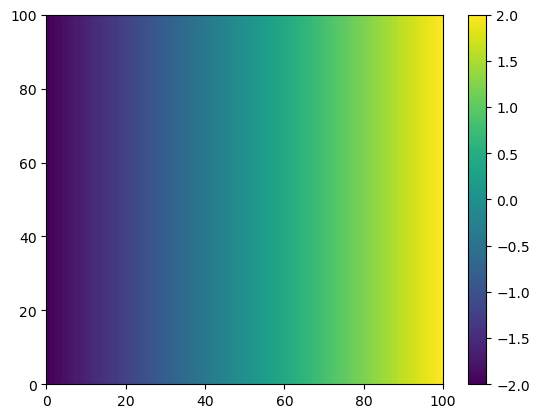

In [51]:
plt.pcolormesh(xx);
plt.colorbar();

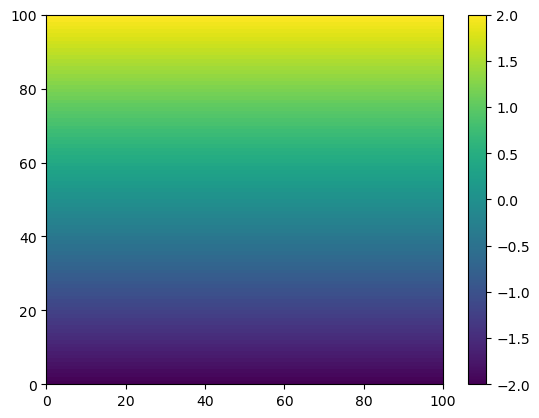

In [53]:
plt.pcolormesh(yy);
plt.colorbar();

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [30]:
r = np.sqrt((xx**2) + (yy**2))
phi = np.arctan(yy,xx)

### 1.4. Visualize $r$ and $\varphi$ on the 2D  $x$ / $y$ plane using `pcolormesh`

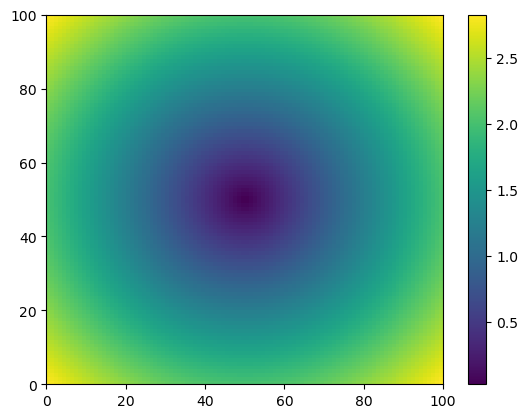

In [31]:
plt.pcolormesh(r);
plt.colorbar();

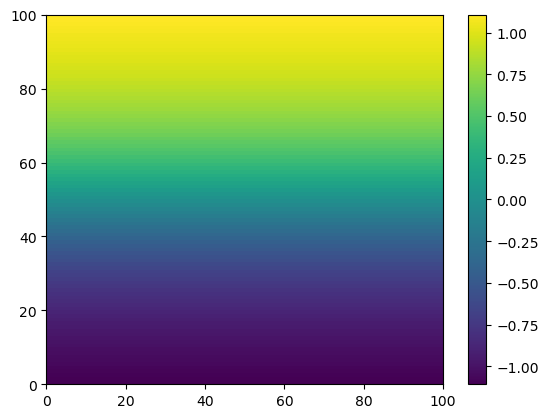

In [33]:
plt.pcolormesh(phi);
plt.colorbar();

### 1.5 Caclulate the quanity $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it on the x$ / $y$ plane

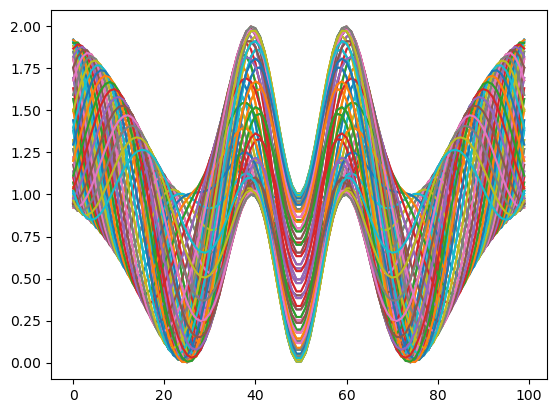

In [46]:
f = (np.cos(4*r)**2) + (np.sin(4*phi)**2)
plt.plot(f);

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

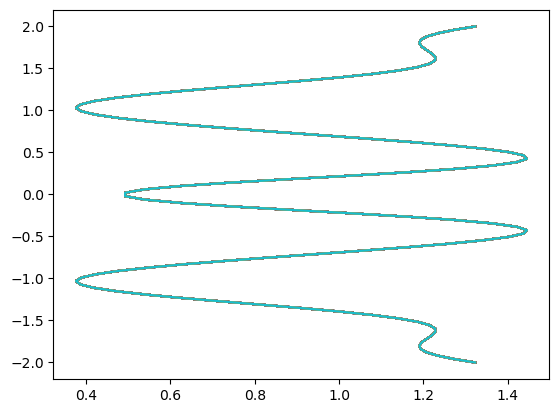

In [57]:
f_xmean = np.mean(f, axis=1)
plt.plot(f_xmean,yy);

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

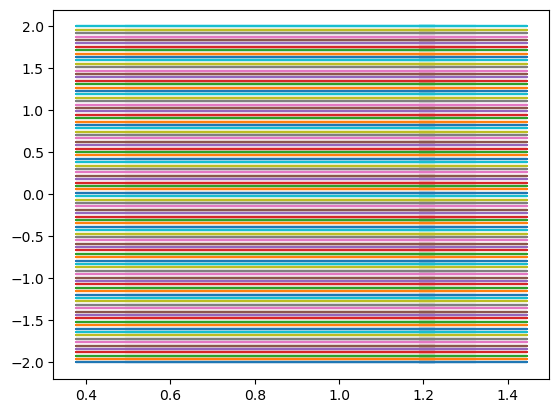

In [60]:
plt.plot(f_xmean,xx);

### 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

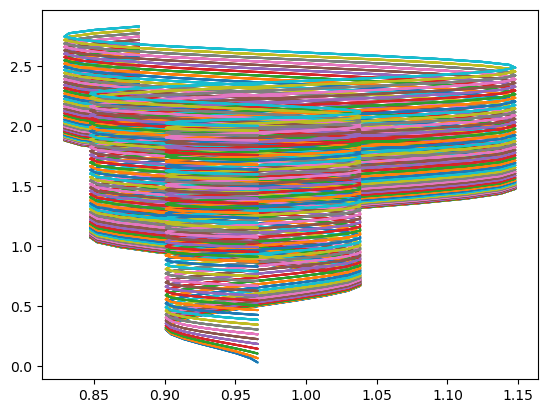

In [63]:
f_ymean = np.mean(f, axis=0)
plt.plot(f_ymean,r);

## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu) Data

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise.
The following code will give you a list of `.npy` files that you can open in the next step.

In [71]:
# Not sure why this did not work; I had to load files manually.
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

ModuleNotFoundError: No module named 'pooch'

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [80]:
T = np.load('T.npy')
S = np.load('S.npy')
P = np.load('P.npy')
date = np.load('date.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')
level = np.load('levels.npy')

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [84]:
print('T shape =',T.shape)
print('S shape =',S.shape)
print('P shape =',P.shape)
print('lon shape =',lon.shape)
print('lat shape =',lat.shape)
print('date shape =',date.shape)
print('level shape =',level.shape)

# Each lat, lon, and date (columns) have corresponding T, S, and P (rows) values at varrying levels. 

T shape = (78, 75)
S shape = (78, 75)
P shape = (78, 75)
lon shape = (75,)
lat shape = (75,)
date shape = (75,)
level shape = (78,)


### 2.3 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Each plot should have a line for each column of data. It will look messy.

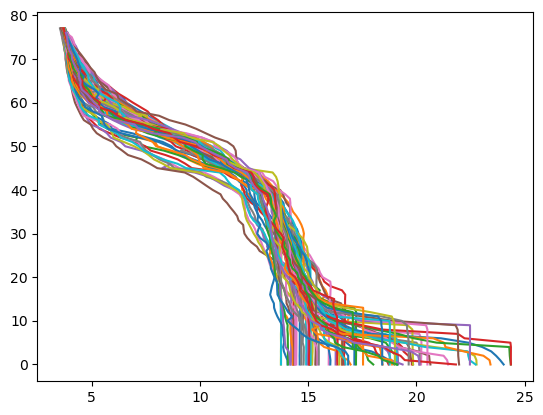

In [94]:
plt.plot(T,level);

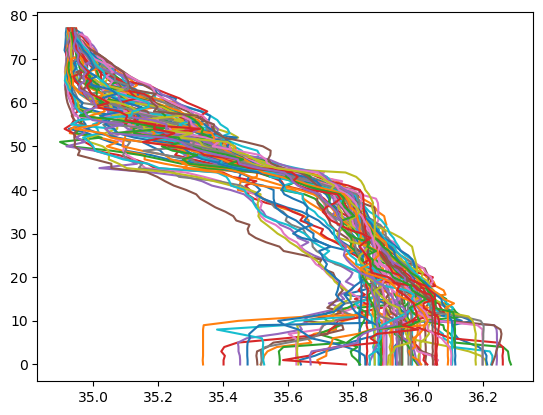

In [88]:
plt.plot(S,level);

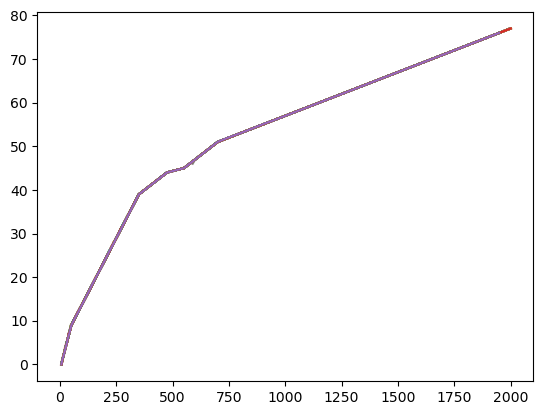

In [89]:
plt.plot(P,level);

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [106]:
T_mean = np.mean(T, axis=1)
T_std = np.std(T, axis=1)
print('T mean:', T_mean)
print('T standard deviation:', T_std)

S_mean = np.mean(S, axis=1)
S_std = np.std(S, axis=1)
print('S mean:', S_mean)
print('S standard deviation:', S_std)

P_mean = np.mean(P, axis=1)
P_std = np.std(P, axis=1)
print('P mean:', P_mean)
print('P standard deviation:', P_std)

T mean: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
T standard deviation: [       nan        nan 

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 


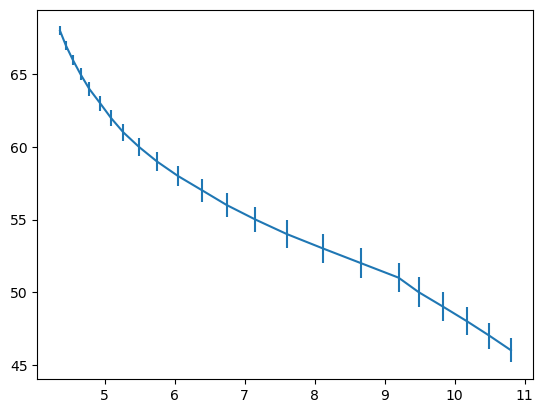

In [108]:
plt.errorbar(T_mean,level,T_std);

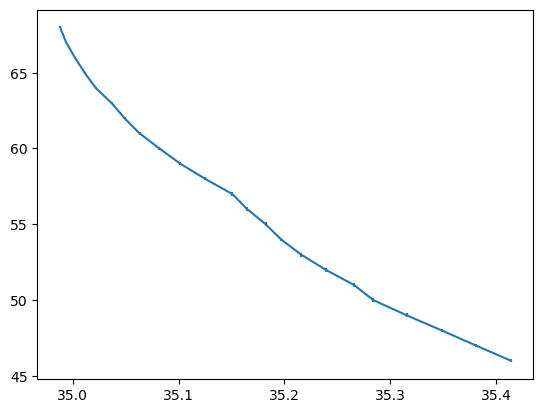

In [109]:
plt.errorbar(S_mean,level,S_std);

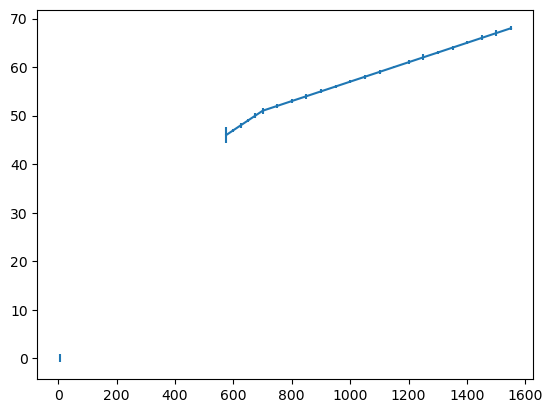

In [110]:
plt.errorbar(P_mean,level,P_std);

### 2.6 Account For Missing Data

The profiles contain many missing values. These are indicated by the special "Not a Number" value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

In [111]:
T_mean = np.nanmean(T, axis=1)
T_std = np.nanstd(T, axis=1)
print('T mean:', T_mean)
print('T standard deviation:', T_std)

S_mean = np.nanmean(S, axis=1)
S_std = np.nanstd(S, axis=1)
print('S mean:', S_mean)
print('S standard deviation:', S_std)

P_mean = np.nanmean(P, axis=1)
P_std = np.nanstd(P, axis=1)
print('P mean:', P_mean)
print('P standard deviation:', P_std)

T mean: [17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]
T standard deviation: [2.92500898 2.86405591 2

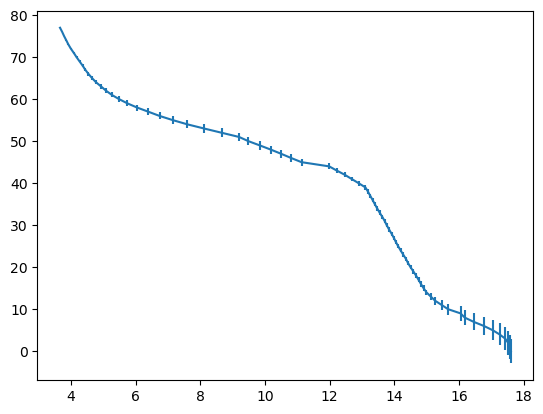

In [112]:
plt.errorbar(T_mean,level,T_std);

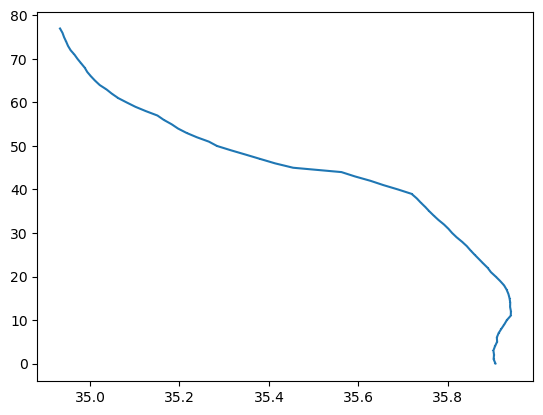

In [113]:
plt.errorbar(S_mean,level,S_std);

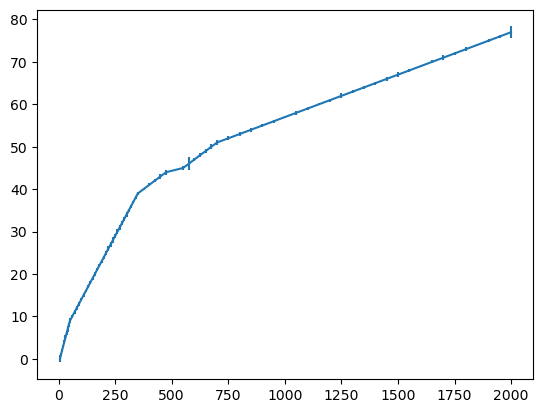

In [114]:
plt.errorbar(P_mean,level,P_std);

### 2.7 Create a scatter plot of the `lon`, `lat` positions of the ARGO float.

Use the [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

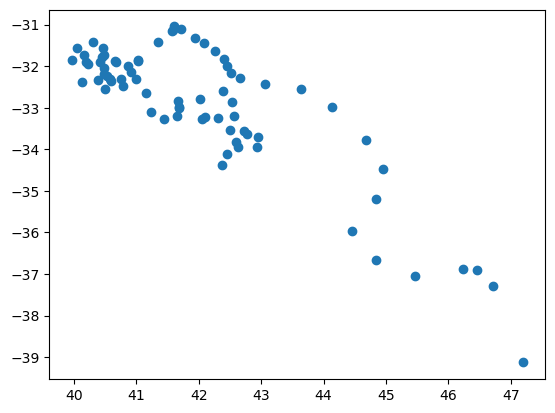

In [115]:
plt.scatter(lat,lon)